<a href="https://colab.research.google.com/github/JSJeong-me/RPA-2023/blob/main/Time_Series/Exercise0615/1_CCC_Decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ETS Decomposition

In [ ]:
# !pip install statsmodels

In [ ]:
import statsmodels

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Additive Model

$y_t = Level + Trend + Seasonality + Noise$

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df=pd.read_excel('CCC.xlsx', index_col='TS', parse_dates=True, dtype={'Value':float})


In [ ]:
df.drop(['Unnamed: 0','Unnamed: 0.1', 'Time', 'Max Value','Date'], axis=1, inplace=True)

In [ ]:
df.index

DatetimeIndex(['2019-10-01 00:15:00', '2019-10-01 00:30:00',
               '2019-10-01 00:45:00', '2019-10-01 01:00:00',
               '2019-10-01 01:15:00', '2019-10-01 01:30:00',
               '2019-10-01 01:45:00', '2019-10-01 02:00:00',
               '2019-10-01 02:15:00', '2019-10-01 02:30:00',
               ...
               '2020-08-31 21:30:00', '2020-08-31 21:45:00',
               '2020-08-31 22:00:00', '2020-08-31 22:15:00',
               '2020-08-31 22:30:00', '2020-08-31 22:45:00',
               '2020-08-31 23:00:00', '2020-08-31 23:15:00',
               '2020-08-31 23:30:00', '2020-08-31 23:45:00'],
              dtype='datetime64[ns]', name='TS', length=32255, freq=None)

In [ ]:
df_day=df.resample(rule='D').sum()

In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 336 entries, 2019-10-01 to 2020-08-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   336 non-null    float64
dtypes: float64(1)
memory usage: 5.2 KB


In [ ]:
df_day.tail()

,Value
TS,
2020-08-27,79910.1
2020-08-28,78551.1
2020-08-29,78011.7
2020-08-30,77128.5
2020-08-31,77797.2


In [ ]:
df_day.Value

In [ ]:
#df['Value']



#df_day

# df_day.drop(df_day.index[335], inplace=True)



In [ ]:
series_day = df_day['Value']

In [ ]:
series_day.tail()

In [ ]:
series_day.describe()

In [ ]:
result_add = seasonal_decompose(series_day, model='additive', period=7)

In [ ]:
def plot_decompose(decomposeresult):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
    decomposeresult.observed.plot(legend=False, ax=ax1)
    ax1.set_ylabel('Observerd')
    decomposeresult.trend.plot(legend=False, ax=ax2)
    ax2.set_ylabel('Trend')
    decomposeresult.seasonal.plot(legend=False, ax=ax3)
    ax3.set_ylabel('Seasonal')
    decomposeresult.resid.plot(legend=False, ax=ax4)
    ax4.set_ylabel('Resid')

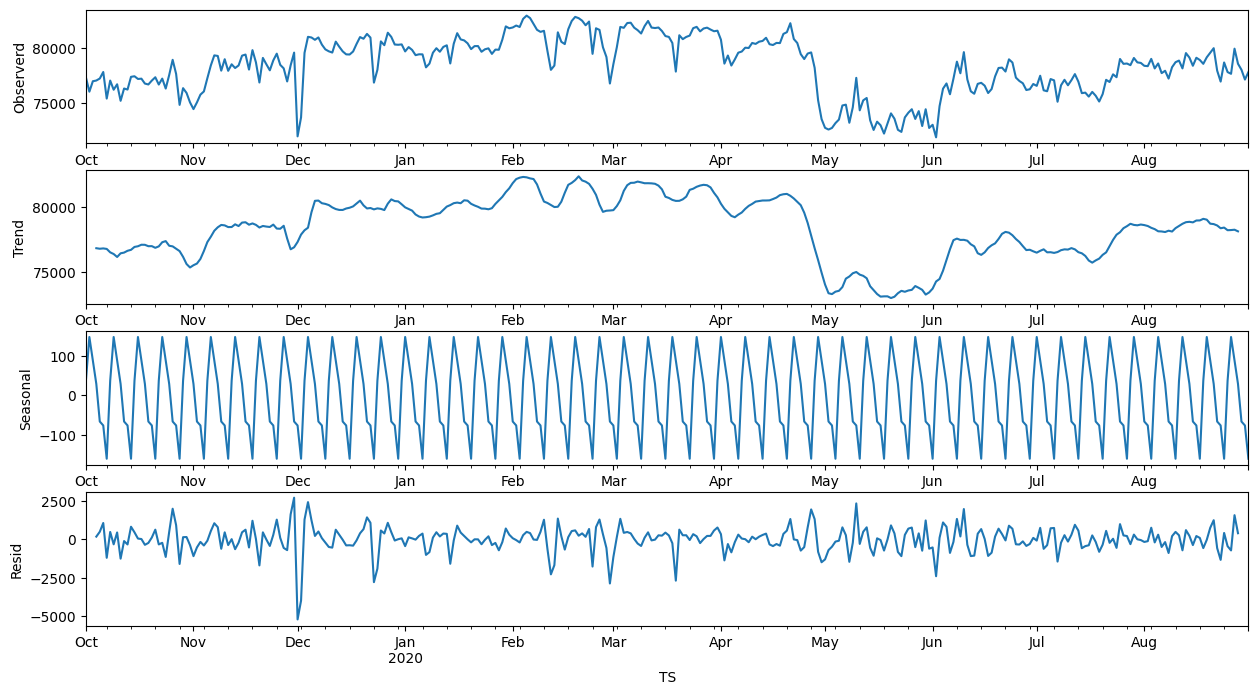

In [ ]:
plot_decompose(result_add)

### Multiplicative Model

$y_t = Level \times Trend \times Seasonality \times Noise$

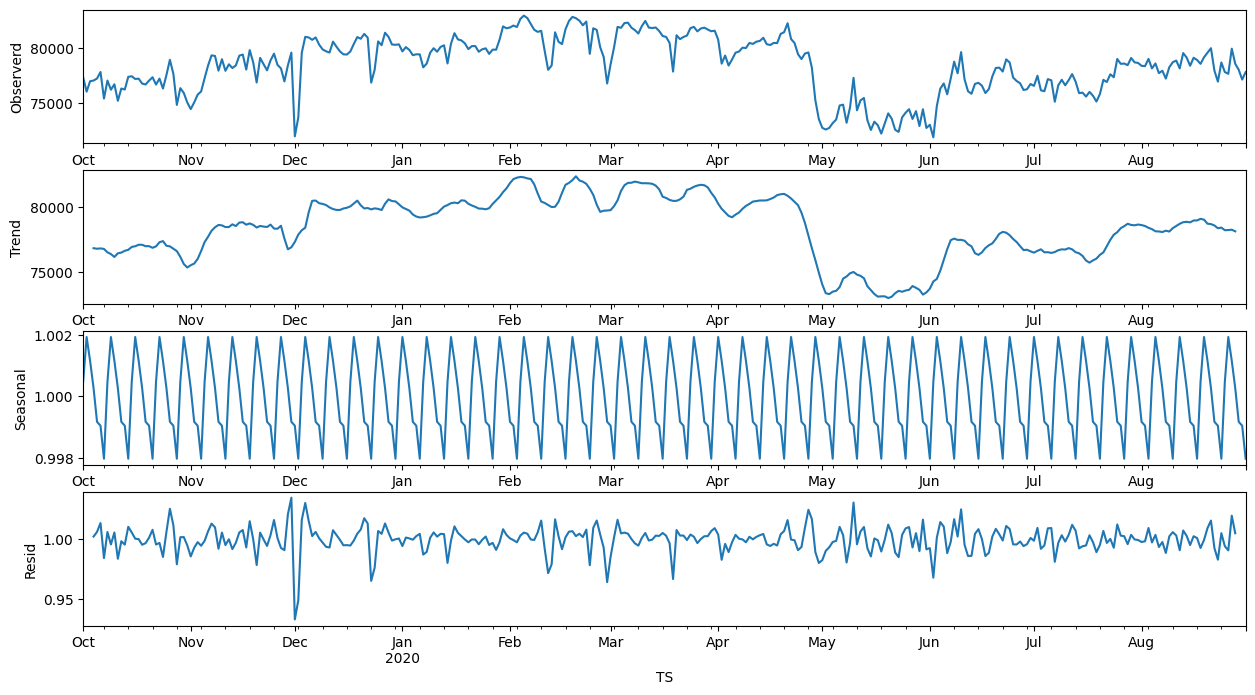

In [ ]:
result_mul = seasonal_decompose(series_day, model='multiplicative')
plot_decompose(result_mul)

## ETS

linear trend 를 가지고 있고 seasonality 와 trend 컴포넌트가 시간흐름에 따라 고정적일 때 (ex 매년 승객 1만명 증가) additive model 을 사용합니다. non-linear 하게 증가하거나 감소하는 trend 를 보일 경우 (ex 매년 승객 수 두 배 증가) multiplicative model 이 더 적합합니다.

챠트를 보면 초기에 비해 후기로 갈 수록 꾸준히 증가하는 비율로 비선형 증가 추세를 보이고 있습니다.

In [ ]:
df=pd.read_excel('CCC.xlsx', index_col='TS', parse_dates=True, dtype={'Value':float})

In [ ]:
df.drop(['Unnamed: 0','Unnamed: 0.1', 'Time', 'Max Value','Date'], axis=1, inplace=True)

In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32255 entries, 2019-10-01 00:15:00 to 2020-08-31 23:45:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   32255 non-null  float64
dtypes: float64(1)
memory usage: 504.0 KB


In [ ]:
df=df.resample(rule='D').sum()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 336 entries, 2019-10-01 to 2020-08-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   336 non-null    float64
dtypes: float64(1)
memory usage: 5.2 KB


In [ ]:
#df.drop(['Dates'], axis=1, inplace=True)
df.drop(df.index[336], inplace=True)

In [ ]:
df.head()

,Value
TS,
2019-10-01,77324.7
2019-10-02,76038.6
2019-10-03,76977.6
2019-10-04,77042.7
2019-10-05,77223.0


In [ ]:
result = seasonal_decompose(df['Value'], model='multiplicative')

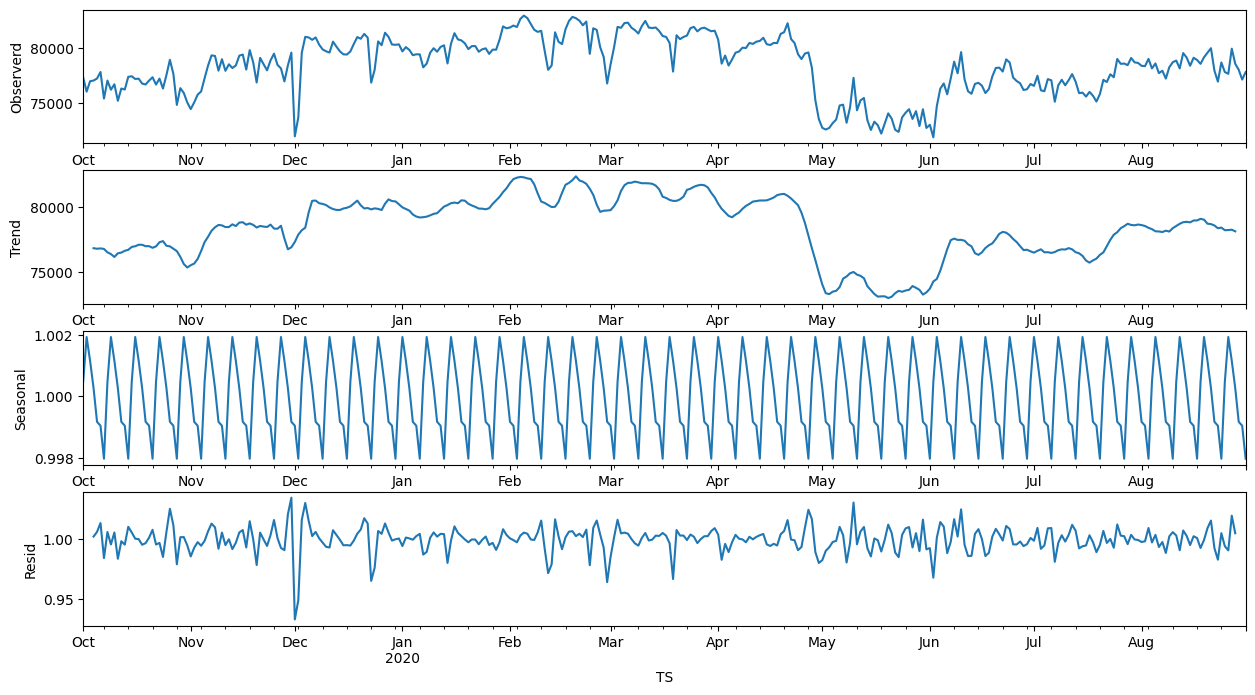

In [ ]:
plot_decompose(result)